Logistic regression


In [114]:
import numpy as np
import pandas as pd
import pylab as pl
import seaborn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [115]:
df=pd.read_csv("bank-full.csv",encoding="cp1251",sep=";") 

In [116]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [117]:
df=df.dropna()

In [118]:
df.apply(lambda x: sum(x=='unknown'),axis=0)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [119]:
df=df.drop(['contact','poutcome'],axis=1)


In [120]:
df=df[(df['job']!='unknown')&(df['education']!='unknown')]

In [121]:
df.apply(lambda x: sum(x=='unknown'),axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [122]:
df.head(50)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,380,1,-1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,50,1,-1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,55,1,-1,0,no
10,41,admin.,divorced,secondary,no,270,yes,no,5,may,222,1,-1,0,no
11,29,admin.,single,secondary,no,390,yes,no,5,may,137,1,-1,0,no


In [123]:
df.shape

(43193, 15)

In [124]:
df['education']=df['education'].map({'primary':0,'secondary':1,'tertiary':3})
df['default']=df['default'].map({'no':0, 'yes':1})
df['housing']=df['housing'].map({'no':0,'yes':1})
df['loan']=df['loan'].map({'no':0,'yes':1})
df['y']=df['y'].map({'no':0,'yes':1})
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,3,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,1,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,76,1,-1,0,0
5,35,management,married,3,0,231,1,0,5,may,139,1,-1,0,0
6,28,management,single,3,0,447,1,1,5,may,217,1,-1,0,0


In [125]:
features=['job','marital','month']
df=pd.get_dummies(df,columns=features)


In [126]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,0,5,139,1,-1,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,1,5,217,1,-1,...,0,0,0,0,0,0,1,0,0,0


In [127]:
from sklearn import preprocessing

In [128]:
x=df.drop('y',axis=1)
y=df['y']

In [129]:
# normalize the data attributes
x = preprocessing.normalize(x)

# standardize the data attributes
x = preprocessing.scale(x)

x

array([[-0.60839212, -0.35837691, -0.09892884, ..., -0.17130466,
        -0.0680749 , -0.05641563],
       [ 1.42209746,  0.42737287, -0.09892884, ..., -0.17130466,
        -0.0680749 , -0.05641563],
       [ 2.42281118,  1.3632364 , -0.09892884, ..., -0.17130466,
        -0.0680749 , -0.05641563],
       ...,
       [-0.72709442, -0.55524224, -0.09892884, ..., -0.00446168,
        -0.0680749 , -0.05641563],
       [-0.27370501, -0.39080289, -0.09892884, ...,  0.98451644,
        -0.0680749 , -0.05641563],
       [-0.72722515, -0.52907026, -0.09892884, ...,  0.15294296,
        -0.0680749 , -0.05641563]])

In [130]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,0,5,139,1,-1,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,1,5,217,1,-1,...,0,0,0,0,0,0,1,0,0,0


In [131]:
x.shape

(43193, 37)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [133]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l2',
#Если распознается 2 класса
multi_class='ovr')


In [134]:
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [135]:
log_reg.score(X_test, y_test)

0.8931162216391418

In [136]:
log_reg.predict_proba(X_test)

array([[0.81649589, 0.18350411],
       [0.81852943, 0.18147057],
       [0.7653589 , 0.2346411 ],
       ...,
       [0.90734823, 0.09265177],
       [0.69829064, 0.30170936],
       [0.94789033, 0.05210967]])

In [137]:
log_reg.coef_

array([[-0.22102762,  0.69051407,  0.01025419,  0.53272126, -1.23798841,
        -0.48543065,  0.16817814,  1.54112289, -1.60178932,  0.34446101,
         0.15010678, -0.3173624 , -0.92331654, -0.40092038, -0.24762494,
        -0.63342172, -0.05345758, -0.24714149, -0.47322748, -0.00543757,
        -0.58090827, -0.19236857, -0.49595093, -1.27725314, -0.7124689 ,
         0.07186825, -0.53254052,  0.04961118, -0.07461103, -0.35304831,
        -0.86953783, -0.24279769,  0.22034808, -1.21341311, -0.3432461 ,
         0.18205682,  0.13928611]])

In [138]:
pred=log_reg.predict(x)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
pred_prob=log_reg.predict_proba(x)
pred_prob

array([[8.91529424e-01, 1.08470576e-01],
       [9.99955161e-01, 4.48388206e-05],
       [1.00000000e+00, 5.81628567e-13],
       ...,
       [7.48655608e-01, 2.51344392e-01],
       [7.62782237e-01, 2.37217763e-01],
       [8.17597270e-01, 1.82402730e-01]])

In [140]:
from sklearn import metrics

In [141]:
pred2=pred_prob[:,1]
fpr,tpr,threshold=metrics.roc_curve(y,pred2)
roc_auc=metrics.auc(fpr,tpr)
pred2

array([1.08470576e-01, 4.48388206e-05, 5.81628567e-13, ...,
       2.51344392e-01, 2.37217763e-01, 1.82402730e-01])

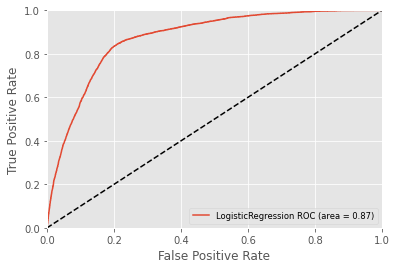

In [142]:
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

In [143]:
from sklearn import metrics
conf_mat=metrics.confusion_matrix(y,pred)
conf_mat=pd.DataFrame(conf_mat,index=log_reg.classes_)
conf_mat

,0,1
0,37435,737
1,3979,1042


Вопрос: почему?  попробовать изменить порог, регуляризация

Логистическая регрессия с измененным порогом итераций до 1000:

In [146]:
log_reg = LogisticRegression(
solver='liblinear',
penalty='l2',
max_iter=1000,
multi_class='ovr')


In [147]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

In [148]:
pred=log_reg.predict(x)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
fpr,tpr,threshold=metrics.roc_curve(y,pred)
roc_auc=metrics.auc(fpr,tpr)

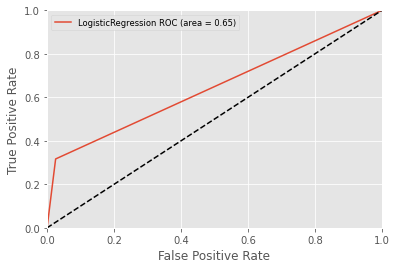

In [169]:
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

In [170]:
conf_mat=metrics.confusion_matrix(y,pred)
conf_mat=pd.DataFrame(conf_mat,index=log_reg.classes_)
conf_mat

,0,1
0,37196,976
1,3431,1590


Немного лучше. Уменьшилась ошибка 1 рода, но возросла ошибка 2 рода.

Может биномиальная регрессия справился лучше?

In [171]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree, max_iter):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(max_iter=max_iter))
    ])

In [172]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [173]:
poly_log_reg = PolynomialLogisticRegression(degree=2, max_iter=1000)
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=1000))])

In [174]:
pred=poly_log_reg.predict(x)
pred

array([0, 0, 0, ..., 0, 0, 0])

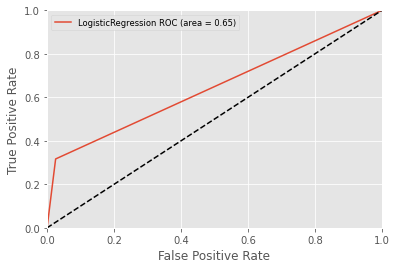

In [175]:
fpr,tpr,threshold=metrics.roc_curve(y,pred)
roc_auc=metrics.auc(fpr,tpr)

pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

In [176]:
conf_mat=metrics.confusion_matrix(y,pred)
conf_mat=pd.DataFrame(conf_mat,index=poly_log_reg.classes_)
conf_mat

,0,1
0,37196,976
1,3431,1590


Биномиальная логистическая регрессия лучше не справилась.

In [164]:
# Изначальная матрица ошибок
conf_mat=metrics.confusion_matrix(y,pred)
conf_mat=pd.DataFrame(conf_mat,index=log_reg.classes_)
conf_mat

,0,1
0,37435,737
1,3979,1042


Наверное так было потому, что было указан малый порог.